# Finviz news

## scraper

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen, Request

In [2]:
# Input symbol
symbol = 'TSLA'

In [3]:
# Set up scraper
url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
html = soup(webpage, "html.parser")

In [4]:
# locate fundamentals table
fundamentals = pd.read_html(str(html), attrs = {'class': 'snapshot-table2'})[0]
fundamentals

,0,1,2,3,4,5,6,7,8,9,10,11
0,Index,S&P 500,P/E,174.11,EPS (ttm),4.92,Insider Own,0.10%,Shs Outstand,1.00B,Perf Week,-0.35%
1,Market Cap,860.63B,Forward P/E,68.24,EPS next Y,12.56,Insider Trans,-94.13%,Shs Float,833.12M,Perf Month,-13.98%
2,Income,5.52B,PEG,8.02,EPS next Q,2.25,Inst Own,41.10%,Short Float,2.89%,Perf Quarter,-21.84%
3,Sales,53.82B,P/S,15.99,EPS this Y,669.20%,Inst Trans,-0.55%,Short Ratio,0.94,Perf Half Y,25.98%
4,Book/sh,29.80,P/B,28.76,EPS next Y,22.06%,ROA,9.70%,Target Price,964.60,Perf Year,19.94%
5,Cash/sh,17.63,P/C,48.60,EPS next 5Y,21.70%,ROE,21.00%,52W Range,539.49 - 1243.49,Perf YTD,-18.91%
6,Dividend,-,P/FCF,75.07,EPS past 5Y,48.60%,ROI,15.70%,52W High,-31.08%,Beta,2.04
7,Dividend %,-,Quick Ratio,1.10,Sales past 5Y,50.40%,Gross Margin,25.30%,52W Low,58.85%,ATR,52.33
8,Employees,99290,Current Ratio,1.40,Sales Q/Q,64.90%,Oper. Margin,12.10%,RSI (14),40.38,Volatility,4.49% 6.15%
9,Optionable,Yes,Debt/Eq,0.23,EPS Q/Q,787.10%,Profit Margin,10.30%,Rel Volume,0.88,Prev Close,876.35


In [5]:
# Reshape dataframe to get two columns dataframe and change column names
columns = fundamentals.values.reshape(-1,2)
fundamentals = pd.DataFrame(columns)
fundamentals['Fundamentals'] = fundamentals[0]
fundamentals['Values'] = fundamentals[1]
fundamentals = fundamentals.drop(fundamentals.columns[[0,1]], axis=1)
fundamentals

,Fundamentals,Values
0,Index,S&P 500
1,P/E,174.11
2,EPS (ttm),4.92
3,Insider Own,0.10%
4,Shs Outstand,1.00B
...,...,...
67,SMA20,-5.40%
68,SMA50,-12.80%
69,SMA200,3.46%
70,Volume,22689269


In [6]:
# Locate news table
news = pd.read_html(str(html), attrs = {'class': 'fullview-news-outer'})[0]
news

,0,1
0,Feb-19-22 12:18AM,Ford Wants to Beat Tesla at Its Own Game TheSt...
1,Feb-18-22 09:39PM,Dow Jones Futures: Biden Says Putin Has Decide...
2,09:10PM,SEC Rebuts Elon Musks Claim That Agency Is Tar...
3,07:04PM,Dow Jones Futures: Market Rally Nearing Lows O...
4,05:39PM,You should publicly announce where the money i...
...,...,...
95,10:07AM,A Seat on a Virgin Galactic Space Trip Costs 1...
96,09:00AM,"Jaguar Land Rover, Nvidia ally in vehicle soft..."
97,08:00AM,Tesla Revenue Up 65% -- Beating Wall Street Es...
98,07:30AM,"Tesla Front-Runs Another Regulator, This Time ..."


In [7]:
# Change column names 
news['Date'] = news[0]
news['Title'] = news[1]
news = news.drop(news.columns[[0,1]], axis=1)
news.head()

,Date,Title
0,Feb-19-22 12:18AM,Ford Wants to Beat Tesla at Its Own Game TheSt...
1,Feb-18-22 09:39PM,Dow Jones Futures: Biden Says Putin Has Decide...
2,09:10PM,SEC Rebuts Elon Musks Claim That Agency Is Tar...
3,07:04PM,Dow Jones Futures: Market Rally Nearing Lows O...
4,05:39PM,You should publicly announce where the money i...


In [8]:
# Locate href (news url) in news table and create a dataframe of  news links
news_link = html.find_all('a', class_ ='tab-link-news')
links = []
for a in news_link:
    links.append(a['href'])
links = pd.DataFrame(links)
links['Link'] = links
links = links.drop(links.columns[0], axis=1)
links.head()

,Link
0,https://www.thestreet.com/investing/ford-wants...
1,https://www.investors.com/market-trend/stock-m...
2,https://finance.yahoo.com/news/sec-refutes-elo...
3,https://www.investors.com/market-trend/stock-m...
4,https://www.marketwatch.com/story/elon-musks-5...


In [9]:
# Concat news titles and news links into one dataframe, set date as index
news = pd.concat([news, links], join='inner', axis=1)
news = news.set_index('Date')
news.head()

,Title,Link
Date,,
Feb-19-22 12:18AM,Ford Wants to Beat Tesla at Its Own Game TheSt...,https://www.thestreet.com/investing/ford-wants...
Feb-18-22 09:39PM,Dow Jones Futures: Biden Says Putin Has Decide...,https://www.investors.com/market-trend/stock-m...
09:10PM,SEC Rebuts Elon Musks Claim That Agency Is Tar...,https://finance.yahoo.com/news/sec-refutes-elo...
07:04PM,Dow Jones Futures: Market Rally Nearing Lows O...,https://www.investors.com/market-trend/stock-m...
05:39PM,You should publicly announce where the money i...,https://www.marketwatch.com/story/elon-musks-5...


In [10]:
# Locate insider trading table, and set the first row as column title
insider_trading = pd.read_html(str(html), attrs = {'class':'body-table'})[0]
insider_trading.columns = insider_trading.iloc[0]
insider_trading = insider_trading.drop([0], axis=0)
insider_trading.head()

,Insider Trading,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4
1,DENHOLM ROBYN M,Director,Feb 01,Option Exercise,52.38,25000,1309500,30000,Feb 03 07:38 PM
2,DENHOLM ROBYN M,Director,Feb 01,Sale,923.57,25000,23089129,5000,Feb 03 07:38 PM
3,Baglino Andrew D,SVP Powertrain and Energy Eng.,Jan 27,Option Exercise,62.72,3500,219520,22749,Jan 31 07:37 PM
4,Baglino Andrew D,SVP Powertrain and Energy Eng.,Jan 27,Sale,933.56,3500,3267460,19249,Jan 31 07:37 PM
5,Kirkhorn Zachary,Chief Financial Officer,Jan 18,Sale,1026.75,1250,1283438,57334,Jan 20 07:39 PM


## save news

In [11]:
! pip install finvizfinance

In [12]:
from pprint import pprint
import finvizfinance 
import finvizfinance.screener 
from finvizfinance.quote import finvizfinance
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yingxu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
# input ticker sample want to obtain news for
ticker = 'SOXL'

In [17]:
# obtain news per ticker
stock = finvizfinance(ticker)
news = stock.ticker_news()
news

,Date,Title,Link
0,2022-02-08 15:45:00,Taking On Volatility With Geared ETFs,https://finance.yahoo.com/news/taking-volatili...
1,2022-02-02 00:00:00,ETFs End Jan. With $37B Inflows,https://finance.yahoo.com/news/etfs-end-jan-37...
2,2022-01-17 19:07:00,The Truth Behind Trading Semiconductor (Chip) ...,https://www.investopedia.com/articles/active-t...
3,2021-06-21 16:30:00,Direxion Changes Index for Semiconductor ETFs,https://finance.yahoo.com/news/direxion-change...
4,2021-03-09 10:00:00,ETF Odds & Ends: IAU Share Split & More,https://finance.yahoo.com/news/etf-odds-ends-i...
...,...,...,...
95,2017-12-29 09:09:00,"The Zacks Analyst Blog Highlights: NAIL, CWEB,...",https://finance.yahoo.com/news/zacks-analyst-b...
96,2017-12-28 10:40:00,7 Top-Performing Leveraged ETFs of 2017,https://finance.yahoo.com/news/7-top-performin...
97,2017-12-28 09:08:00,Chips On The Table: An Aggressive Semiconducto...,https://finance.yahoo.com/news/chips-table-agg...
98,2017-12-26 06:00:00,Top 3 Performing ETFs for 2018,https://www.investopedia.com/articles/etfs/top...


In [19]:
news['Ticker'] = ticker
news['Date']= pd.to_datetime(news['Date'])
news

,Date,Title,Link,Ticker
0,2022-02-08 15:45:00,Taking On Volatility With Geared ETFs,https://finance.yahoo.com/news/taking-volatili...,SOXL
1,2022-02-02 00:00:00,ETFs End Jan. With $37B Inflows,https://finance.yahoo.com/news/etfs-end-jan-37...,SOXL
2,2022-01-17 19:07:00,The Truth Behind Trading Semiconductor (Chip) ...,https://www.investopedia.com/articles/active-t...,SOXL
3,2021-06-21 16:30:00,Direxion Changes Index for Semiconductor ETFs,https://finance.yahoo.com/news/direxion-change...,SOXL
4,2021-03-09 10:00:00,ETF Odds & Ends: IAU Share Split & More,https://finance.yahoo.com/news/etf-odds-ends-i...,SOXL
...,...,...,...,...
95,2017-12-29 09:09:00,"The Zacks Analyst Blog Highlights: NAIL, CWEB,...",https://finance.yahoo.com/news/zacks-analyst-b...,SOXL
96,2017-12-28 10:40:00,7 Top-Performing Leveraged ETFs of 2017,https://finance.yahoo.com/news/7-top-performin...,SOXL
97,2017-12-28 09:08:00,Chips On The Table: An Aggressive Semiconducto...,https://finance.yahoo.com/news/chips-table-agg...,SOXL
98,2017-12-26 06:00:00,Top 3 Performing ETFs for 2018,https://www.investopedia.com/articles/etfs/top...,SOXL


In [21]:
!pwd

/Users/yingxu/stockanalysis/notebooks


In [22]:
news.to_csv('/Users/yingxu/stockanalysis/notebooks/news')

## sentiment

In [23]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Iterate through the headlines and get the polarity scores using vader
scores = news['Title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores = pd.DataFrame(scores)
scores.head()

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,1.000,0.000,0.0000
2,0.0,0.723,0.277,0.3182
3,0.0,1.000,0.000,0.0000
4,0.0,0.732,0.268,0.2960


In [24]:
sentiment = pd.concat([news, scores], join='inner', axis=1)
sentiment.head()

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2022-02-08 15:45:00,Taking On Volatility With Geared ETFs,https://finance.yahoo.com/news/taking-volatili...,SOXL,0.0,1.000,0.000,0.0000
1,2022-02-02 00:00:00,ETFs End Jan. With $37B Inflows,https://finance.yahoo.com/news/etfs-end-jan-37...,SOXL,0.0,1.000,0.000,0.0000
2,2022-01-17 19:07:00,The Truth Behind Trading Semiconductor (Chip) ...,https://www.investopedia.com/articles/active-t...,SOXL,0.0,0.723,0.277,0.3182
3,2021-06-21 16:30:00,Direxion Changes Index for Semiconductor ETFs,https://finance.yahoo.com/news/direxion-change...,SOXL,0.0,1.000,0.000,0.0000
4,2021-03-09 10:00:00,ETF Odds & Ends: IAU Share Split & More,https://finance.yahoo.com/news/etf-odds-ends-i...,SOXL,0.0,0.732,0.268,0.2960


In [25]:
sentiment.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.056510,0.820170,0.123310,0.073853
std,0.118514,0.203442,0.168006,0.318086
min,0.000000,0.238000,0.000000,-0.812600
25%,0.000000,0.690000,0.000000,0.000000
50%,0.000000,0.846000,0.000000,0.000000
75%,0.000000,1.000000,0.257750,0.225725
max,0.510000,1.000000,0.540000,0.735100


In [26]:
sentiment = sentiment.groupby('Ticker').mean()
sentiment

,neg,neu,pos,compound
Ticker,,,,
SOXL,0.05651,0.82017,0.12331,0.073853


<AxesSubplot:title={'center':'SOXL Sentiment Analysis'}, xlabel='Ticker', ylabel='sentiment'>

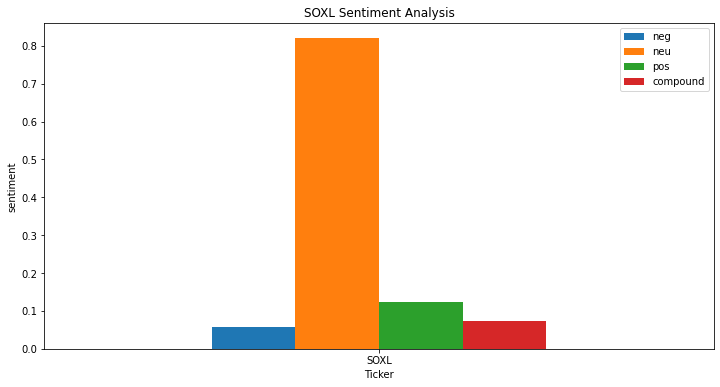

In [27]:
sentiment.plot.bar(figsize=(12,6),title=f'{ticker} Sentiment Analysis',ylabel='sentiment', rot=0)

# Finviz news data - medium methods

## AAPL - def function

In [48]:
# medium link
# https://medium.datadriveninvestor.com/scraping-live-stock-fundamental-ratios-news-and-more-with-python-a716329e0493

In [28]:
# set up
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen

pd.set_option('display.max_colwidth', 25)

# Input
symbol = input('Enter a ticker: ')
print ('Getting data for ' + symbol + '...\n')

# Set up scraper
url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
html = soup(webpage, "html.parser")

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.
Enter a ticker: AAPL
Getting data for AAPL...



In [29]:
def get_fundamentals():
    try:
        # Find fundamentals table
        fundamentals = pd.read_html(str(html), attrs = {'class': 'snapshot-table2'})[0]
        
        # Clean up fundamentals dataframe
        fundamentals.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
        colOne = []
        colLength = len(fundamentals)
        for k in np.arange(0, colLength, 2):
            colOne.append(fundamentals[f'{k}'])
        attrs = pd.concat(colOne, ignore_index=True)
    
        colTwo = []
        colLength = len(fundamentals)
        for k in np.arange(1, colLength, 2):
            colTwo.append(fundamentals[f'{k}'])
        vals = pd.concat(colTwo, ignore_index=True)
        
        fundamentals = pd.DataFrame()
        fundamentals['Attributes'] = attrs
        fundamentals['Values'] = vals
        fundamentals = fundamentals.set_index('Attributes')
        return fundamentals

    except Exception as e:
        return e


In [30]:
def get_news():
    try:
        # Find news table
        news = pd.read_html(str(html), attrs = {'class': 'fullview-news-outer'})[0]
        links = []
        for a in html.find_all('a', class_="tab-link-news"):
            links.append(a['href'])
        
        # Clean up news dataframe
        news.columns = ['Date', 'News Headline']
        news['Article Link'] = links
        news = news.set_index('Date')
        return news

    except Exception as e:
        return e

In [31]:
def get_insider():
    try:
        # Find insider table
        insider = pd.read_html(str(html), attrs = {'class': 'body-table'})[0]
        
        # Clean up insider dataframe
        insider = insider.iloc[1:]
        insider.columns = ['Trader', 'Relationship', 'Date', 'Transaction', 'Cost', '# Shares', 'Value ($)', '# Shares Total', 'SEC Form 4']
        insider = insider[['Date', 'Trader', 'Relationship', 'Transaction', 'Cost', '# Shares', 'Value ($)', '# Shares Total', 'SEC Form 4']]
        insider = insider.set_index('Date')
        return insider

    except Exception as e:
        return e

In [33]:
print ('Fundamental Ratios: ')
print(get_fundamentals())

Fundamental Ratios: 
                 Values
Attributes             
Index       DJIA S&P500
Market Cap     2786.58B
Income          100.56B
Sales           378.32B
Book/sh            4.39
...                 ...
ATR                4.27
Volatility  2.00% 2.58%
Prev Close       168.88
Price            167.30
Change           -0.94%

[72 rows x 1 columns]


In [34]:
print ('\nRecent News: ')
print(get_news())


Recent News: 
                              News Headline              Article Link
Date                                                                 
Feb-19-22 05:58AM  Dow Jones Futures: Bi...  https://www.investors...
Feb-18-22 07:04PM  Dow Jones Futures: Ma...  https://www.investors...
05:14PM            Apple store unions co...  https://finance.yahoo...
04:38PM            ISS supports Apple sh...  https://finance.yahoo...
02:40PM            Frances Haugen takes ...  https://finance.yahoo...
...                                     ...                       ...
11:38AM            Disney stock extends ...  https://finance.yahoo...
11:38AM            Apple Stock Is Beatin...  https://www.barrons.c...
11:16AM            Best Growth Stocks to...  https://finance.yahoo...
09:25AM            Where Will Apple Be i...  https://www.fool.com/...
08:51AM            The Nasdaq Is Getting...  https://www.barrons.c...

[100 rows x 2 columns]


In [35]:
print ('\nRecent Insider Trades: ')
print(get_insider())


Recent Insider Trades: 
                    Trader              Relationship Transaction    Cost  \
Date                                                                       
Feb 03  Adams Katherine L.     SVP, GC and Secretary        Sale  174.78   
Feb 01   LEVINSON ARTHUR D                  Director        Sale  173.29   
Nov 12         KONDO CHRIS  Principal Accounting ...        Sale  150.00   
Nov 01  Adams Katherine L.     SVP, GC and Secretary        Sale  148.68   
Oct 19        Maestri Luca  Senior Vice President...        Sale  148.62   
Oct 18     O'BRIEN DEIRDRE     Senior Vice President        Sale  146.35   
Oct 04  WILLIAMS JEFFREY E                       COO        Sale  138.83   
Oct 04     O'BRIEN DEIRDRE     Senior Vice President        Sale  138.83   
Aug 25      COOK TIMOTHY D   Chief Executive Officer        Sale  148.58   
Aug 06     O'BRIEN DEIRDRE     Senior Vice President        Sale  145.99   
Aug 02  Adams Katherine L.     SVP, GC and Secretary        Sal

## TSLA - test the function

In [39]:
symbol = input('Enter a ticker: ')
print ('Getting data for ' + symbol + '...\n')

# Set up scraper
url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
html = soup(webpage, "html.parser")

Enter a ticker: TSLA
Getting data for TSLA...



In [40]:
print ('Fundamental Ratios: ')
print(get_fundamentals())

Fundamental Ratios: 
                 Values
Attributes             
Index           S&P 500
Market Cap      860.63B
Income            5.52B
Sales            53.82B
Book/sh           29.80
...                 ...
ATR               52.33
Volatility  4.49% 6.15%
Prev Close       876.35
Price            856.98
Change           -2.21%

[72 rows x 1 columns]


In [41]:
print ('\nRecent News: ')
print(get_news())


Recent News: 
                              News Headline              Article Link
Date                                                                 
Feb-19-22 06:40AM  Dow Jones Futures: Bi...  https://www.investors...
06:16AM            Tesla Stock Vs. BYD S...  https://www.investors...
12:18AM            Ford Wants to Beat Te...  https://www.thestreet...
Feb-18-22 09:10PM  SEC Rebuts Elon Musks...  https://finance.yahoo...
07:04PM            Dow Jones Futures: Ma...  https://www.investors...
...                                     ...                       ...
10:07AM            A Seat on a Virgin Ga...  https://www.barrons.c...
09:00AM            Jaguar Land Rover, Nv...  https://finance.yahoo...
08:00AM            Tesla Revenue Up 65% ...  https://www.fool.com/...
07:30AM            Tesla Front-Runs Anot...  https://finance.yahoo...
07:19AM            Top 5 Nasdaq Composit...  https://finance.yahoo...

[100 rows x 2 columns]


In [42]:
print ('\nRecent Insider Trades: ')
print(get_insider())


Recent Insider Trades: 
                  Trader              Relationship      Transaction     Cost  \
Date                                                                           
Feb 01   DENHOLM ROBYN M                  Director  Option Exercise    52.38   
Feb 01   DENHOLM ROBYN M                  Director             Sale   923.57   
Jan 27  Baglino Andrew D  SVP Powertrain and En...  Option Exercise    62.72   
Jan 27  Baglino Andrew D  SVP Powertrain and En...             Sale   933.56   
Jan 18  Kirkhorn Zachary   Chief Financial Officer             Sale  1026.75   
...                  ...                       ...              ...      ...   
Jul 27  Baglino Andrew D  SVP Powertrain and En...  Option Exercise    51.64   
Jul 27  Baglino Andrew D  SVP Powertrain and En...             Sale   663.38   
Jul 19  Kirkhorn Zachary   Chief Financial Officer             Sale   629.73   
Jul 06    Taneja Vaibhav  Chief Accounting Officer  Option Exercise    54.67   
Jul 06    Tanej

## GOOG - modify the function

In [43]:
symbol = 'GOOG'

# Set up scraper
url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
html = soup(webpage, "html.parser")

In [44]:
print ('\nRecent News: ')
print(get_news())


Recent News: 
                              News Headline              Article Link
Date                                                                 
Feb-18-22 03:11PM  Google trims Triangle...  https://www.bizjourna...
02:14PM            How Google (Alphabet)...  https://www.investope...
01:48PM            10 Best Stocks to Buy...  https://finance.yahoo...
01:35PM            Microsofts 10 Biggest...  https://finance.yahoo...
12:51PM            U.K. Storm Alert Leve...  https://finance.yahoo...
...                                     ...                       ...
10:34AM            Seas Free Fire Among ...  https://finance.yahoo...
09:31AM            10 New Stock Picks of...  https://finance.yahoo...
09:29AM            India Bans 54 Chinese...  https://finance.yahoo...
08:16AM            Dow Jones Futures Era...  https://www.investors...
08:01AM            What Does Alphabet In...  https://finance.yahoo...

[100 rows x 2 columns]


In [51]:
def get_nasdaq_news(symbol ='GOOG'):
    # Set up scraper
    url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    html = soup(webpage, "html.parser")
    
    try:
        # Find news table
        news = pd.read_html(str(html), attrs = {'class': 'fullview-news-outer'})[0]
        links = []
        for a in html.find_all('a', class_="tab-link-news"):
            links.append(a['href'])
        
        # Clean up news dataframe
        news.columns = ['Date', 'News Headline']
        news['Article Link'] = links
        news = news.set_index('Date')
        return pd.DataFrame(news)

    except Exception as e:
        return e

In [52]:
get_nasdaq_news('AAPL')

,News Headline,Article Link
Date,,
Feb-19-22 07:06AM,Dow Jones Futures: Bi...,https://www.investors...
Feb-18-22 07:04PM,Dow Jones Futures: Ma...,https://www.investors...
05:14PM,Apple store unions co...,https://finance.yahoo...
04:38PM,ISS supports Apple sh...,https://finance.yahoo...
02:40PM,Frances Haugen takes ...,https://finance.yahoo...
...,...,...
11:38AM,Disney stock extends ...,https://finance.yahoo...
11:38AM,Apple Stock Is Beatin...,https://www.barrons.c...
11:16AM,Best Growth Stocks to...,https://finance.yahoo...


## AAPL - finviz package

In [53]:
import finvizfinance 
import finvizfinance.screener 
from finvizfinance.quote import finvizfinance

In [54]:
import finvizfinance 
import finvizfinance.screener 
from finvizfinance.quote import finvizfinance

def get_fin_news(ticker = 'AAPL'):
    # obtain news per ticker
    stock = finvizfinance(ticker)
    news = stock.ticker_news()
    news['Ticker'] = ticker
    news['Date']= pd.to_datetime(news['Date'])
    # save the news
    # news.to_csv('/Users/yingxu/stockanalysis/notebooks/news')
    return news

In [55]:
get_fin_news()

,Date,Title,Link,Ticker
0,2022-02-19 07:27:00,Dow Jones Futures: Bi...,https://www.investors...,AAPL
1,2022-02-18 19:04:00,Dow Jones Futures: Ma...,https://www.investors...,AAPL
2,2022-02-18 17:14:00,Apple store unions co...,https://finance.yahoo...,AAPL
3,2022-02-18 16:38:00,ISS supports Apple sh...,https://finance.yahoo...,AAPL
4,2022-02-18 14:40:00,Frances Haugen takes ...,https://finance.yahoo...,AAPL
...,...,...,...,...
95,2022-02-15 11:38:00,Disney stock extends ...,https://finance.yahoo...,AAPL
96,2022-02-15 11:38:00,Apple Stock Is Beatin...,https://www.barrons.c...,AAPL
97,2022-02-15 11:16:00,Best Growth Stocks to...,https://finance.yahoo...,AAPL
98,2022-02-15 09:25:00,Where Will Apple Be i...,https://www.fool.com/...,AAPL


In [57]:
get_fin_news()['Title']

0     Dow Jones Futures: Bi...
1     6 Anti-Trust Laws Tha...
2     Dow Jones Futures: Ma...
3     Apple store unions co...
4     ISS supports Apple sh...
                ...           
95    EU deal on single mob...
96    Disney stock extends ...
97    Apple Stock Is Beatin...
98    Best Growth Stocks to...
99    Where Will Apple Be i...
Name: Title, Length: 100, dtype: object

# EODHistorical news

In [9]:
# import package

import requests
from termcolor import colored as cl

api_key = '6210f88b0463b0.30836752'

In [29]:
# extracting financial news

def get_eod_news(stock, start_date, end_date, n_news, api_key, offset = 0):
    url = f'https://eodhistoricaldata.com/api/news?api_token={api_key}&s={stock}&limit={n_news}&offset={offset}&from={start_date}&to={end_date}'
    news_json = requests.get(url).json()
    
     news = []
    
     for i in range(len(news_json)):
         title = news_json[-i]['title']
         news.append(title)
         print(cl('{}. '.format(i+1), attrs = ['bold']), '{}'.format(title))
    
    return news

In [30]:
AAPL_news = get_eod_news('AAPL', '2020-11-09', '2021-11-11', 10, api_key, 0)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## test - AAPL

In [34]:
url = "https://eodhistoricaldata.com/api/news?api_token=OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX&s=AAPL.US&offset=0&limit=10"
news_json = requests.get(url).json()
news_json

[{'date': '2022-02-19T13:40:49+00:00',
  'title': "Dow Jones Futures: Markets Await Putin's Ukraine Invasion Decision; Five Stocks That Don't Suck",
  'content': "President Biden said late Friday that Putin has decided to invade Ukraine. Apple leads five stocks that don't suck.",
  'link': 'https://finance.yahoo.com/m/88444a8f-9381-3495-abd5-501314c58ba7/dow-jones-futures%3A-markets.html',
  'symbols': ['TSLA.US',
   'AAPL.US',
   'NVDA.US',
   'UNP.US',
   'NTR.US',
   'ORLY.US',
   'CMC.US',
   'COMP.US',
   'GSPC.INDX',
   'DJI.INDX',
   'IXIC.INDX',
   'N7T.F',
   'OM6.F',
   'NTR.TO'],
  'tags': ['DOW JONES',
   'STOCK MARKET',
   'NASDAQ FUTURES',
   'VLADIMIR PUTIN',
   'MARKET RALLY',
   'RUSSIA',
   'UKRAINE']},
 {'date': '2022-02-19T13:28:38+00:00',
  'title': 'Apple, Hilton Lead Five Stocks Near Buy Points Flashing This Bullish Signal',
  'content': 'Apple and Hilton lead this watch list of five stocks near buy points with relative strength lines already breaking out.',
  'l

In [51]:
def get_eod_news_AAPL():
    news = []

    for i in range(len(news_json)):
        
        title = news_json[-i]['title']
        news.append(title)
        date = news_json[-i]['date']
        news.append(date)
        date = news_json[-i]['content']
        news.append(content)
        date = news_json[-i]['link']
        news.append(link)
    
    return news

In [52]:
get_eod_news_AAPL()

NameError: name 'content' is not defined

# NSDQ news

In [15]:
!pwd

/Users/yingxu/stockanalysis/notebooks


In [17]:
import nasdaqdatalink

In [19]:
data = nasdaqdatalink.get('NSE/OIL')
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2009-09-30,1096.00,1156.70,1090.00,1135.00,1141.20,19748012.0,223877.07
2009-10-01,1102.00,1173.70,1102.00,1167.00,1166.35,3074254.0,35463.78
2009-10-05,1152.00,1165.90,1136.60,1143.00,1140.55,919832.0,10581.13
2009-10-06,1149.80,1157.20,1132.10,1143.30,1144.90,627957.0,7185.90
2009-10-07,1153.80,1160.70,1140.00,1141.45,1141.60,698216.0,8032.98
...,...,...,...,...,...,...,...
2018-12-31,178.10,179.00,174.35,175.00,174.80,761462.0,1343.75
2019-01-01,175.00,176.40,174.15,175.15,175.75,381570.0,669.16
2019-01-02,175.80,176.20,171.00,172.35,172.40,722532.0,1251.85


In [31]:
data = nasdaqdatalink.get_table('ZACKS/FC', ticker='AAPL')
data

DataLinkError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@data.nasdaq.com.

In [32]:
data = nasdaqdatalink.get_table('ZACKS/FC', paginate=True, ticker=['AAPL', 'MSFT'], per_end_date={'gte': '2015-01-01'}, qopts={'columns':['ticker', 'per_end_date']})
data

DataLinkError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@data.nasdaq.com.

## scraping NSDQ

In [55]:
import requests
from bs4 import BeautifulSoup 
import csv
import pandas as pd

In [56]:
symbol = "AAPL"

In [ ]:
url = f"https://www.nasdaq.com/market-activity/stocks/{symbol}/news-headlines"
requests = requests.get(url)
data = requests.text
soup = BeautifulSoup(data)

# Yahoo finance data scraping -AAPL

In [4]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from selenium import webdriver
import chromedriver_binary
import string
pd.options.display.float_format = '{:.0f}'.format

In [5]:
is_link = 'https://finance.yahoo.com/quote/AAPL/financials?p=AAPL'
driver = webdriver.Chrome()
driver.get(is_link)
html = driver.execute_script('return document.body.innerHTML;')
soup = BeautifulSoup(html,'lxml')

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 99
Current browser version is 98.0.4758.109 with binary path /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
Stacktrace:
0   chromedriver                        0x0000000102b4b159 chromedriver + 5120345
1   chromedriver                        0x0000000102ad8b13 chromedriver + 4651795
2   chromedriver                        0x00000001026c8e68 chromedriver + 392808
3   chromedriver                        0x00000001026ef1e6 chromedriver + 549350
4   chromedriver                        0x00000001026eac72 chromedriver + 531570
5   chromedriver                        0x00000001026e76ed chromedriver + 517869
6   chromedriver                        0x0000000102721825 chromedriver + 755749
7   chromedriver                        0x000000010271ba33 chromedriver + 731699
8   chromedriver                        0x00000001026f15dd chromedriver + 558557
9   chromedriver                        0x00000001026f24f5 chromedriver + 562421
10  chromedriver                        0x0000000102b0838d chromedriver + 4846477
11  chromedriver                        0x0000000102b2221c chromedriver + 4952604
12  chromedriver                        0x0000000102b27a12 chromedriver + 4975122
13  chromedriver                        0x0000000102b22b4a chromedriver + 4954954
14  chromedriver                        0x0000000102afd5b0 chromedriver + 4801968
15  chromedriver                        0x0000000102b3cf78 chromedriver + 5062520
16  chromedriver                        0x0000000102b3d0ff chromedriver + 5062911
17  chromedriver                        0x0000000102b52545 chromedriver + 5150021
18  libsystem_pthread.dylib             0x00007ff81f4164f4 _pthread_start + 125
19  libsystem_pthread.dylib             0x00007ff81f41200f thread_start + 15


## pulling financial statement data

https://towardsdatascience.com/web-scraping-yahoo-finance-477fe3daa852

In [6]:
features = soup.find_all('div', class_='D(tbr)')

NameError: name 'soup' is not defined

In [7]:
headers = []
temp_list = []
label_list = []
final = []
index = 0
#create headers
for item in features[0].find_all('div', class_='D(ib)'):
    headers.append(item.text)
#statement contents
while index <= len(features)-1:
    #filter for each line of the statement
    temp = features[index].find_all('div', class_='D(tbc)')
    for line in temp:
        #each item adding to a temporary list
        temp_list.append(line.text)
    #temp_list added to final list
    final.append(temp_list)
    #clear temp_list
    temp_list = []
    index+=1
df = pd.DataFrame(final[1:])
df.columns = headers

NameError: name 'features' is not defined

In [8]:
#function to make all values numerical
def convert_to_numeric(column):
    first_col = [i.replace(',','') for i in column]
    second_col = [i.replace('-','') for i in first_col]
    final_col = pd.to_numeric(second_col)
    
    return final_col

In [9]:
for column in headers[1:]:
    
    df[column] = convert_to_numeric(df[column])
final_df = df.fillna('-')

NameError: name 'df' is not defined